Importing modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

Reading the MNIST dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Data pre processing

In [ ]:
# Shifting training data values between 0 and 1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Increasing input size to make it network-compatible, the new size representing the image channel.
# Being greyscale images, the channel is only 1 (and not 3 as for example in classic RGB images)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# Splitting training set in training (80%) and validation set (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Checking that the changes have been carried out correctly
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_val.shape[0], "validation samples")
print(X_test.shape[0], "test samples")

# Getting the One-Hot-Encoding representation needed to work with neural networks
numero_classi = 10 # Dataset composed of numbers 0 -> 9
y_train = keras.utils.to_categorical(y_train, numero_classi)
y_val = keras.utils.to_categorical(y_val, numero_classi)
y_test = keras.utils.to_categorical(y_test, numero_classi)
print("y_train shape:", y_train.shape)

X_train shape: (48000, 28, 28, 1)
48000 train samples
12000 validation samples
10000 test samples
y_train shape: (48000, 10)


Showing some dataset's images

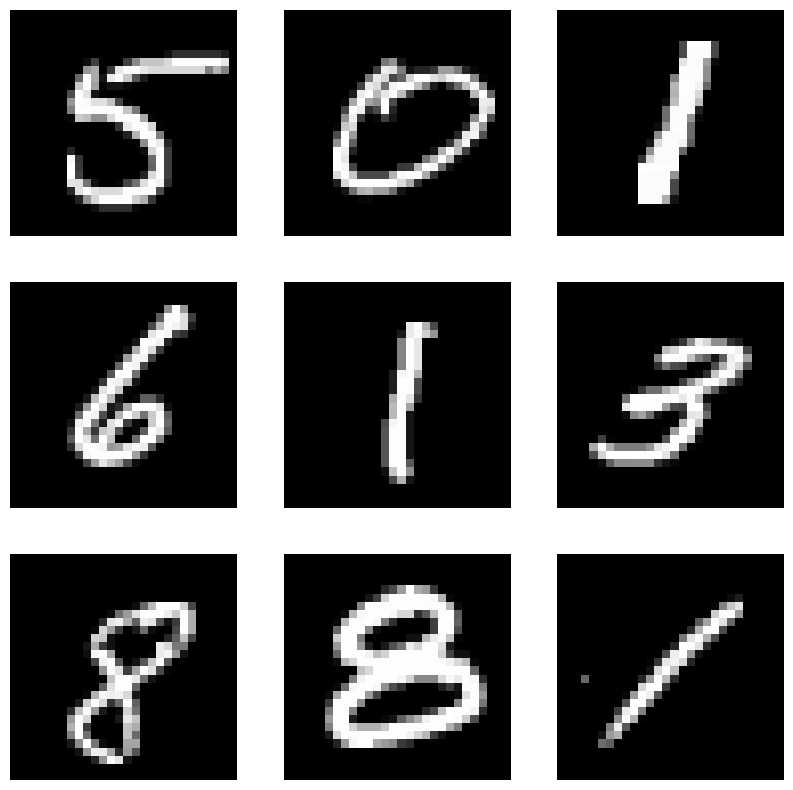

In [ ]:
show_images(X_train, 9)

Showing how classes are distribuited in the dataset

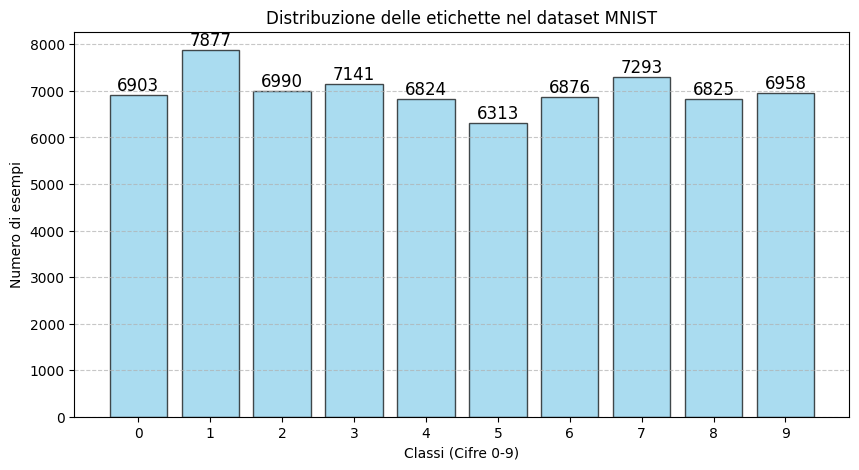

In [ ]:
label_distribution(y_train, y_val, y_test)

Method for the creation of the net

In [ ]:
# Building the net
def create_net(input_shape):
  net = keras.Sequential(
      [
          keras.Input(shape=input_shape),
          layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
          layers.MaxPooling2D(pool_size=(2, 2)),
          layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
          layers.MaxPooling2D(pool_size=(2, 2)),
          layers.Flatten(), # Layer required to switch from convolutional to fully connected layers
          layers.Dropout(0.5), # Dropout layer to prevent overfitting
          layers.Dense(numero_classi, activation="softmax"),
      ]
  )
  return net

Creating the net wich will be trained with 3 optimizer

In [ ]:
# Getting the input shape
input_shape = X_train.shape[1:]
# Defining batch size and number of epochs
batch_size = 128
epochs = 50

# Creating a net with Adam
adam_net = create_net(input_shape)
adam_net.compile(loss="categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
# Training
print("Training network with Adam\n")
adam_history = adam_net.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), verbose=2)

# Creating a net with RMSprop
rmsprop_net = create_net(input_shape)
rmsprop_net.compile(loss="categorical_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])
# Training
print("\nTraining network with RMSprop\n")
rmsprop_history = rmsprop_net.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), verbose=2)

# Creating a net with Adagrad
adagrad_net = create_net(input_shape)
adagrad_net.compile(loss="categorical_crossentropy", optimizer = "adagrad", metrics = ["accuracy"])
# Training
print("\nTraining network with Adagrad\n")
adagrad_history = adagrad_net.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), verbose=2)

Training network with Adam

Epoch 1/50
375/375 - 8s - 21ms/step - accuracy: 0.8817 - loss: 0.3930 - val_accuracy: 0.9685 - val_loss: 0.1126
Epoch 2/50
375/375 - 5s - 14ms/step - accuracy: 0.9636 - loss: 0.1186 - val_accuracy: 0.9793 - val_loss: 0.0718
Epoch 3/50
375/375 - 2s - 6ms/step - accuracy: 0.9722 - loss: 0.0903 - val_accuracy: 0.9826 - val_loss: 0.0617
Epoch 4/50
375/375 - 2s - 4ms/step - accuracy: 0.9770 - loss: 0.0741 - val_accuracy: 0.9841 - val_loss: 0.0509
Epoch 5/50
375/375 - 3s - 7ms/step - accuracy: 0.9789 - loss: 0.0679 - val_accuracy: 0.9852 - val_loss: 0.0482
Epoch 6/50
375/375 - 2s - 4ms/step - accuracy: 0.9818 - loss: 0.0589 - val_accuracy: 0.9871 - val_loss: 0.0428
Epoch 7/50
375/375 - 3s - 7ms/step - accuracy: 0.9831 - loss: 0.0541 - val_accuracy: 0.9884 - val_loss: 0.0413
Epoch 8/50
375/375 - 3s - 7ms/step - accuracy: 0.9842 - loss: 0.0491 - val_accuracy: 0.9883 - val_loss: 0.0416
Epoch 9/50
375/375 - 3s - 8ms/step - accuracy: 0.9843 - loss: 0.0494 - val_accurac

Showing loss plot

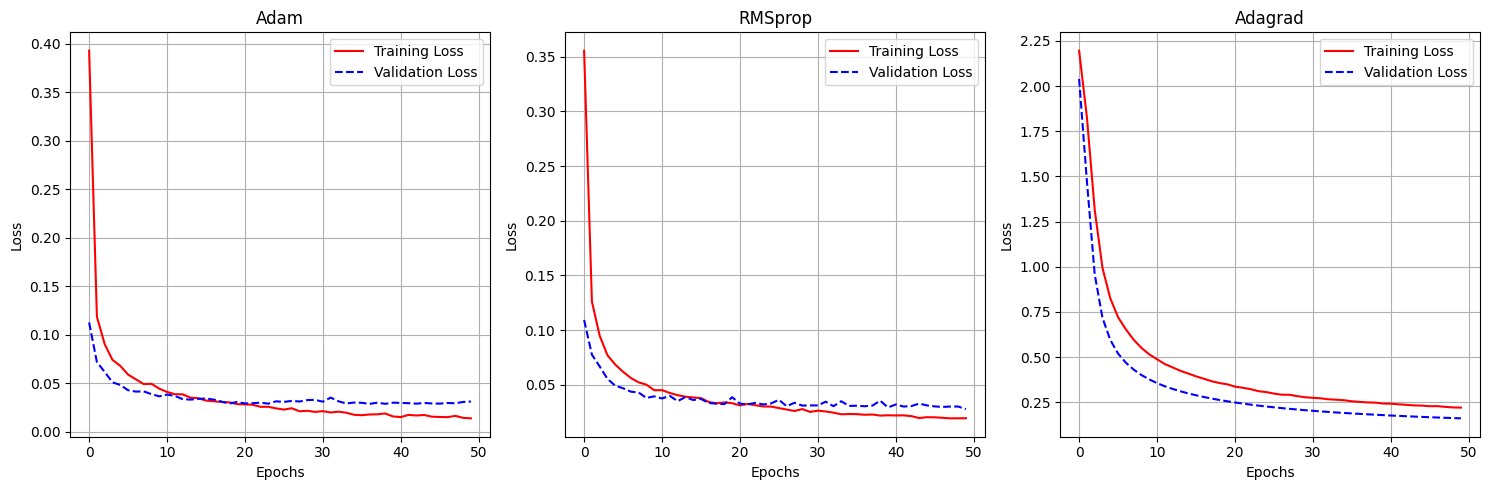

In [ ]:
plot_loss(adam_history, rmsprop_history, adagrad_history)

Showing accuracy plot

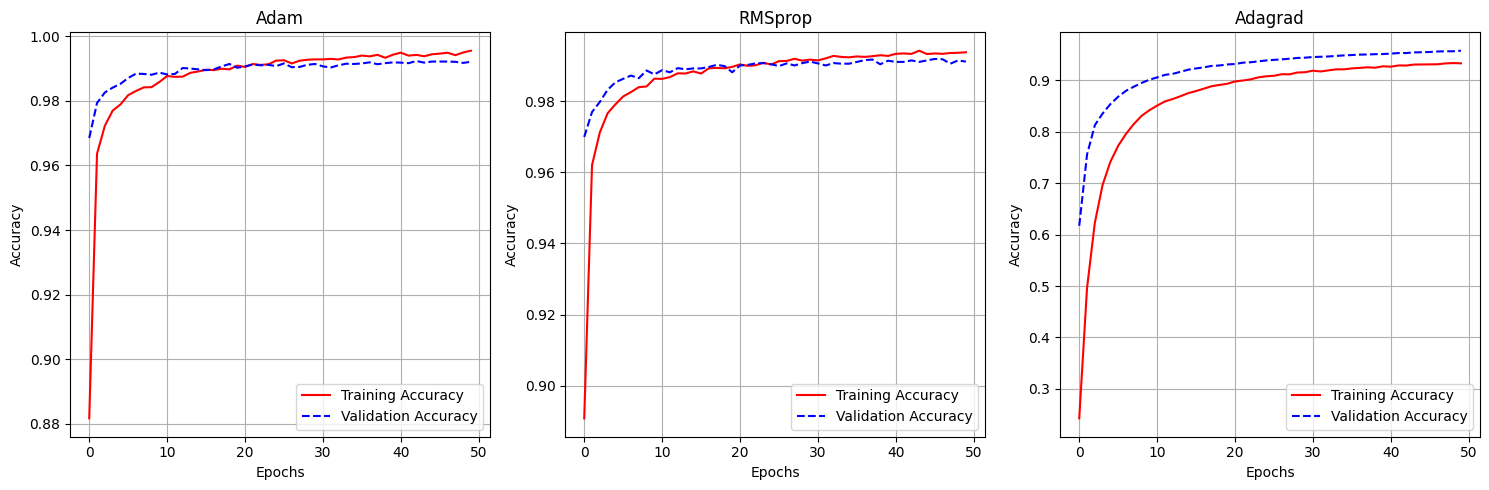

In [ ]:
plot_accuracy(adam_history, rmsprop_history, adagrad_history)

Testing the networks

In [ ]:
adam_test_loss, adam_test_accuracy = adam_net.evaluate(X_test, y_test, verbose=2)
print(f"Adam test loss: {adam_test_loss:.4f}")
print(f"Adam test accuracy: {adam_test_accuracy:.4f}\n")

rmsprop_test_loss, rmsprop_test_accuracy = rmsprop_net.evaluate(X_test, y_test, verbose=2)
print(f"RMSprop test loss: {rmsprop_test_loss:.4f}")
print(f"RMSprop test accuracy: {rmsprop_test_accuracy:.4f}\n")

adagrad_test_loss, adagrad_test_accuracy = adagrad_net.evaluate(X_test, y_test, verbose=2)
print(f"Adagrad test loss: {adagrad_test_loss:.4f}")
print(f"Adagrad test accuracy: {adagrad_test_accuracy:.4f}\n")

313/313 - 2s - 5ms/step - accuracy: 0.9927 - loss: 0.0239
Adam test loss: 0.0239
Adam test accuracy: 0.9927

313/313 - 1s - 4ms/step - accuracy: 0.9928 - loss: 0.0230
RMSprop test loss: 0.0230
RMSprop test accuracy: 0.9928

313/313 - 1s - 4ms/step - accuracy: 0.9584 - loss: 0.1479
Adagrad test loss: 0.1479
Adagrad test accuracy: 0.9584



Methods for the generations of plots

In [ ]:
# Method for displaying MNIST dataset images
def show_images(X_train, num_immages):
    plt.figure(figsize=(10, 10))  # Setting window size
    for i in range(num_immages):
        plt.subplot(3, 3, i + 1)  # Layout 3x3
        plt.imshow(X_train[i].squeeze(), cmap='gray')  # Removing extra channel
        plt.axis('off')  # Removing the axes
    plt.show()

# Plot the distrubution of classes
def label_distribution(y_train, y_val, y_test):
        # Combining train, validation and test set
    all_labels = np.concatenate([y_train, y_val, y_test])

    # Converting to numeric labels if one hot encoded
    if all_labels.ndim > 1:
        all_labels = np.argmax(all_labels, axis=1)

    # Counting labels
    unique_labels, counts = np.unique(all_labels, return_counts=True)

    # Making the plot
    plt.figure(figsize=(10, 5))
    bars = plt.bar(unique_labels, counts, color='skyblue', edgecolor='black', alpha=0.7)

    # Adding values above each bar
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, str(count),
                 ha='center', fontsize=12)

    # Graph customisation
    plt.xticks(range(10))  # Showing the labels (from 0 to 9)
    plt.xlabel("Classi (Cifre 0-9)")
    plt.ylabel("Numero di esempi")
    plt.title("Distribuzione delle etichette nel dataset MNIST")
    plt.grid(axis='y', linestyle="--", alpha=0.7)

    # Showing the plot
    plt.show()

# Method for plotting the losses of the three models
def plot_loss(history_adam, history_rmsprop, history_adagrad):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns
    histories = [("Adam", history_adam), ("RMSprop", history_rmsprop), ("Adagrad", history_adagrad)]

    for i, (opt_name, hist) in enumerate(histories):
        ax = axes[i]
        ax.plot(hist.history['loss'], label='Training Loss', color='red')
        ax.plot(hist.history['val_loss'], '--', label='Validation Loss', color='blue')
        ax.set_title(f'{opt_name}')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Loss')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()  # To avoid overlaps
    plt.show()

# Method for plotting the accuracy of the three models
def plot_accuracy(history_adam, history_rmsprop, history_adagrad):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    histories = [("Adam", history_adam), ("RMSprop", history_rmsprop), ("Adagrad", history_adagrad)]

    for i, (opt_name, hist) in enumerate(histories):
        ax = axes[i]
        ax.plot(hist.history['accuracy'], label='Training Accuracy', color='red')
        ax.plot(hist.history['val_accuracy'], '--', label='Validation Accuracy', color='blue')
        ax.set_title(f'{opt_name}')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Accuracy')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()
